In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv('train.csv')
print(df.shape)

(116892, 24)


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116892 entries, 0 to 116891
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Id                                 116892 non-null  int64  
 1   satisfaction                       116892 non-null  object 
 2   Gender                             116892 non-null  object 
 3   Customer Type                      116892 non-null  object 
 4   Age                                116892 non-null  int64  
 5   Type of Travel                     116892 non-null  object 
 6   Class                              116892 non-null  object 
 7   Flight Distance                    116892 non-null  int64  
 8   Seat comfort                       116892 non-null  int64  
 9   Departure/Arrival time convenient  116892 non-null  int64  
 10  Food and drink                     116892 non-null  int64  
 11  Gate location                      1168

In [33]:
print(df.isnull().sum())

Id                                     0
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             351
dtype: int64


In [34]:
df.head()

,Id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,86347,satisfied,Male,Loyal Customer,50,Business travel,Business,1548,5,5,...,5,3,3,3,3,5,3,4,0,0.0
1,115822,satisfied,Male,Loyal Customer,51,Business travel,Business,4020,5,5,...,4,5,5,5,5,5,5,5,53,51.0
2,16351,dissatisfied,Male,Loyal Customer,14,Personal Travel,Eco,2328,2,5,...,1,1,5,3,3,4,4,1,0,4.0
3,107284,satisfied,Female,Loyal Customer,52,Business travel,Business,3761,2,2,...,5,4,4,4,4,4,4,5,61,55.0
4,5788,dissatisfied,Female,Loyal Customer,26,Personal Travel,Eco,3348,1,5,...,5,5,3,4,3,5,1,5,196,169.0


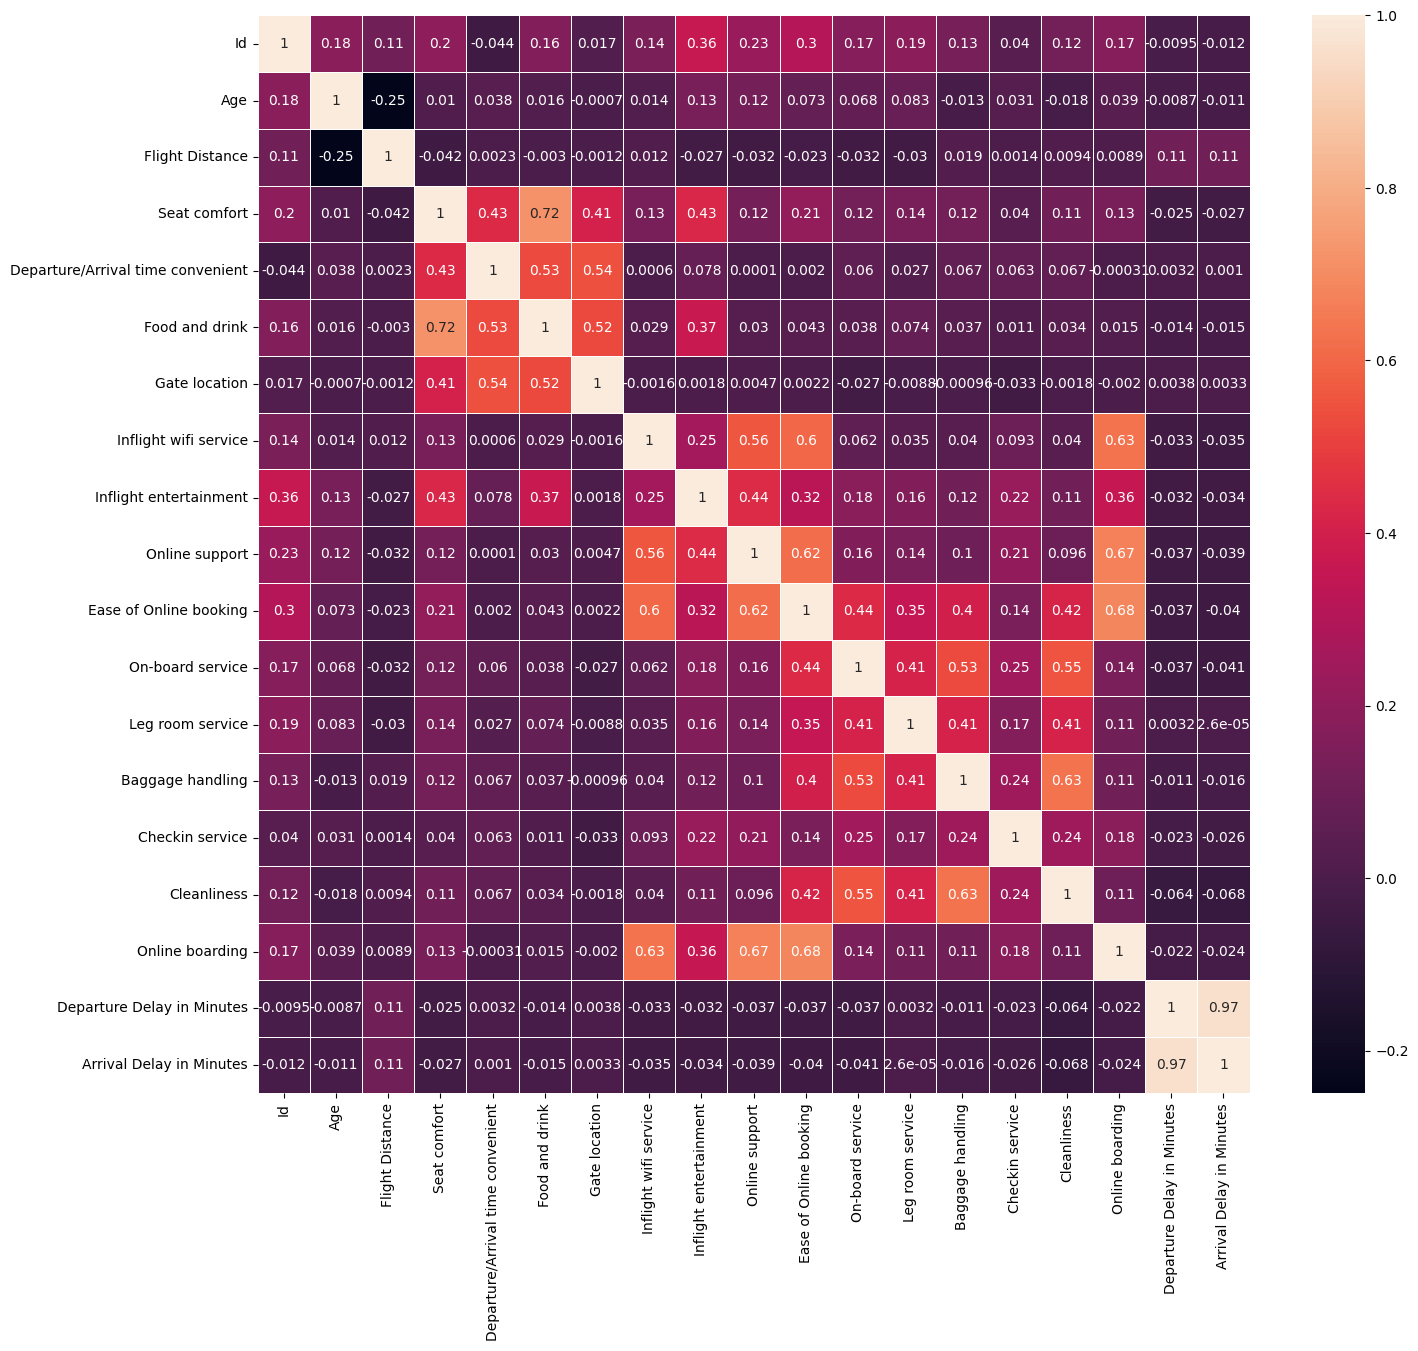

In [35]:
# Select only integer and float columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Now df has object columns converted to numerical values using Label Encoding
df.head()

,Id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,86347,1,1,0,50,0,0,1548,5,5,...,5,3,3,3,3,5,3,4,0,0.0
1,115822,1,1,0,51,0,0,4020,5,5,...,4,5,5,5,5,5,5,5,53,51.0
2,16351,0,1,0,14,1,1,2328,2,5,...,1,1,5,3,3,4,4,1,0,4.0
3,107284,1,0,0,52,0,0,3761,2,2,...,5,4,4,4,4,4,4,5,61,55.0
4,5788,0,0,0,26,1,1,3348,1,5,...,5,5,3,4,3,5,1,5,196,169.0
